1. Tìm 10 departments bán được nhiều sản phẩm nhất

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

In [2]:
#dim department
department = pd.read_csv(r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B9\instacart-data\departments.csv')

In [3]:
#dim aisle
ais = pd.read_csv(r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B9\instacart-data\aisles.csv')

In [4]:
# fact product orders
order_prd = pd.read_csv(r'C:\Users\Hoanpc.TSTDESK01\Desktop\order_products__prior.csv')

In [5]:
#dim product
prd = pd.read_csv(r'C:\Users\Hoanpc.TSTDESK01\Desktop\Python\B9\instacart-data\products.csv')

In [6]:
# Merge
merge_dep = pd.merge(order_prd,prd,on='product_id')['department_id']
# Count department frequentcy
count_deps = merge_dep.value_counts().reset_index()
count_deps.columns = ['department_id','count']
#Top 10 deps
n_deps =count_deps.nlargest(10, columns='count')
# Get name of deps
name_deps = pd.merge(n_deps,department, on = 'department_id')
name_deps.iloc[:,[2,1]]

,department,count
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


In [7]:
#Convert value to "thousand"
Count=name_deps['count']/1000
name_deps['count'] = Count
name_deps['count'].round(2)

0    9479.29
1    5414.02
2    2887.55
3    2690.13
4    2236.43
5    1875.58
6    1176.79
7    1068.06
8    1051.25
9     866.63
Name: count, dtype: float64

** Vẽ biểu đồ cột và tinh chỉnh hiển thị số liệu sao cho thuận lợi trình bày, người xem chỉ cần nhìn biểu đồ là nắm được đầy đủ thông tin
* Cần có title, số liệu cho từng cột, tên các cột

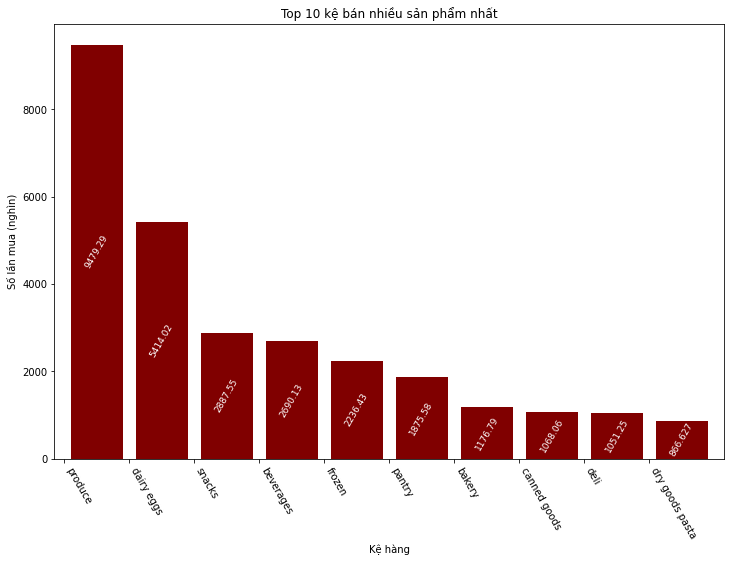

In [8]:
ax = name_deps.plot.bar(x='department', y='count', width=0.8, figsize=(12,8), 
                           color='maroon', legend=None, rot=-60)
ax.bar_label(container=ax.containers[0], label_type='center', fontsize=9, rotation=60,color = 'white')
ax.set_xticks(name_deps.index-0.5)
ax.set_xticklabels(name_deps['department'], ha='left')
ax.set_title('Top 10 kệ bán nhiều sản phẩm nhất')
ax.set_xlabel('Kệ hàng')
ax.set_ylabel('Số lần mua (nghìn)')
plt.show()
plt.close('all')

Tính tổng số sản phẩm đã bán được của phần còn lại
* Theo kệ hàng - The rest

In [9]:
name_deps_rest = pd.merge(count_deps.iloc[11:,:],department, on = 'department_id')
name_deps_rest.iloc[:,[2,1]]

,department,count
0,breakfast,709569
1,meat seafood,708931
2,personal care,447123
3,babies,423802
4,international,269253
5,alcohol,153696
6,pets,97724
7,missing,69145
8,other,36291
9,bulk,34573


* Theo hành lang - Top 10

In [10]:
# Merge
merge_ais = pd.merge(order_prd,prd,on='product_id')['aisle_id']
# Count ais frequentcy
count_ais = merge_ais.value_counts().reset_index()
count_ais.columns = ['aisle_id','count']
#Top 10 ais
n_ais =count_ais.nlargest(10, columns='count')
# Get name of deps
name_ais = pd.merge(n_ais,ais, on = 'aisle_id')
name_ais.iloc[:,[2,1]]

,aisle,count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,891015
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


* Theo hành lang - tất cả

In [11]:
name_ais_all = pd.merge(count_ais,ais, on = 'aisle_id')
name_ais_all.iloc[:,[2,1]]

,aisle,count
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
...,...,...
129,eye ear care,8974
130,baby bath body care,8581
131,baby accessories,8160
132,beauty,6168


Vẽ biểu đồ tree-map hiển thị kết quả trên


In [29]:
text_rest_deps = name_deps_rest['department'] + ': ' + name_deps_rest['count'].astype(str)
new_table = name_deps_rest.join(text_rest_deps.to_frame())
new_table.columns = ['department_id','count','department','text']
new_table

,department_id,count,department,text
0,14,709569,breakfast,breakfast: 709569
1,12,708931,meat seafood,meat seafood: 708931
2,11,447123,personal care,personal care: 447123
3,18,423802,babies,babies: 423802
4,6,269253,international,international: 269253
5,5,153696,alcohol,alcohol: 153696
6,8,97724,pets,pets: 97724
7,21,69145,missing,missing: 69145
8,2,36291,other,other: 36291
9,10,34573,bulk,bulk: 34573


In [48]:
#Convert to thousand
k = name_ais_all['count']/1000

In [49]:

text_ais = name_ais_all['aisle'] + ': ' + k.round(1).astype(str)
new_table_1 = name_ais_all.join(text_ais.to_frame())
new_table_1.columns = ['aisle_id','count','aisle','text']
new_table_1

,aisle_id,count,aisle,text
0,24,3642188,fresh fruits,fresh fruits: 3642.2
1,83,3418021,fresh vegetables,fresh vegetables: 3418.0
2,123,1765313,packaged vegetables fruits,packaged vegetables fruits: 1765.3
3,120,1452343,yogurt,yogurt: 1452.3
4,21,979763,packaged cheese,packaged cheese: 979.8
...,...,...,...,...
129,44,8974,eye ear care,eye ear care: 9.0
130,102,8581,baby bath body care,baby bath body care: 8.6
131,82,8160,baby accessories,baby accessories: 8.2
132,132,6168,beauty,beauty: 6.2


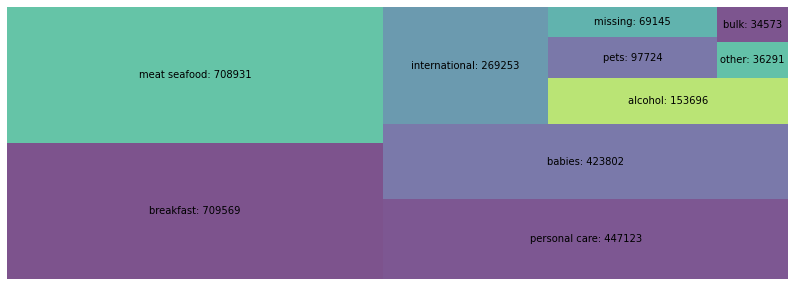

In [32]:
# %pip install squarify
import squarify
fig = plt.figure(figsize=(14,5))
squarify.plot(sizes=new_table['count'], label=new_table['text'], alpha=0.7)
plt.axis("off")
plt.show()

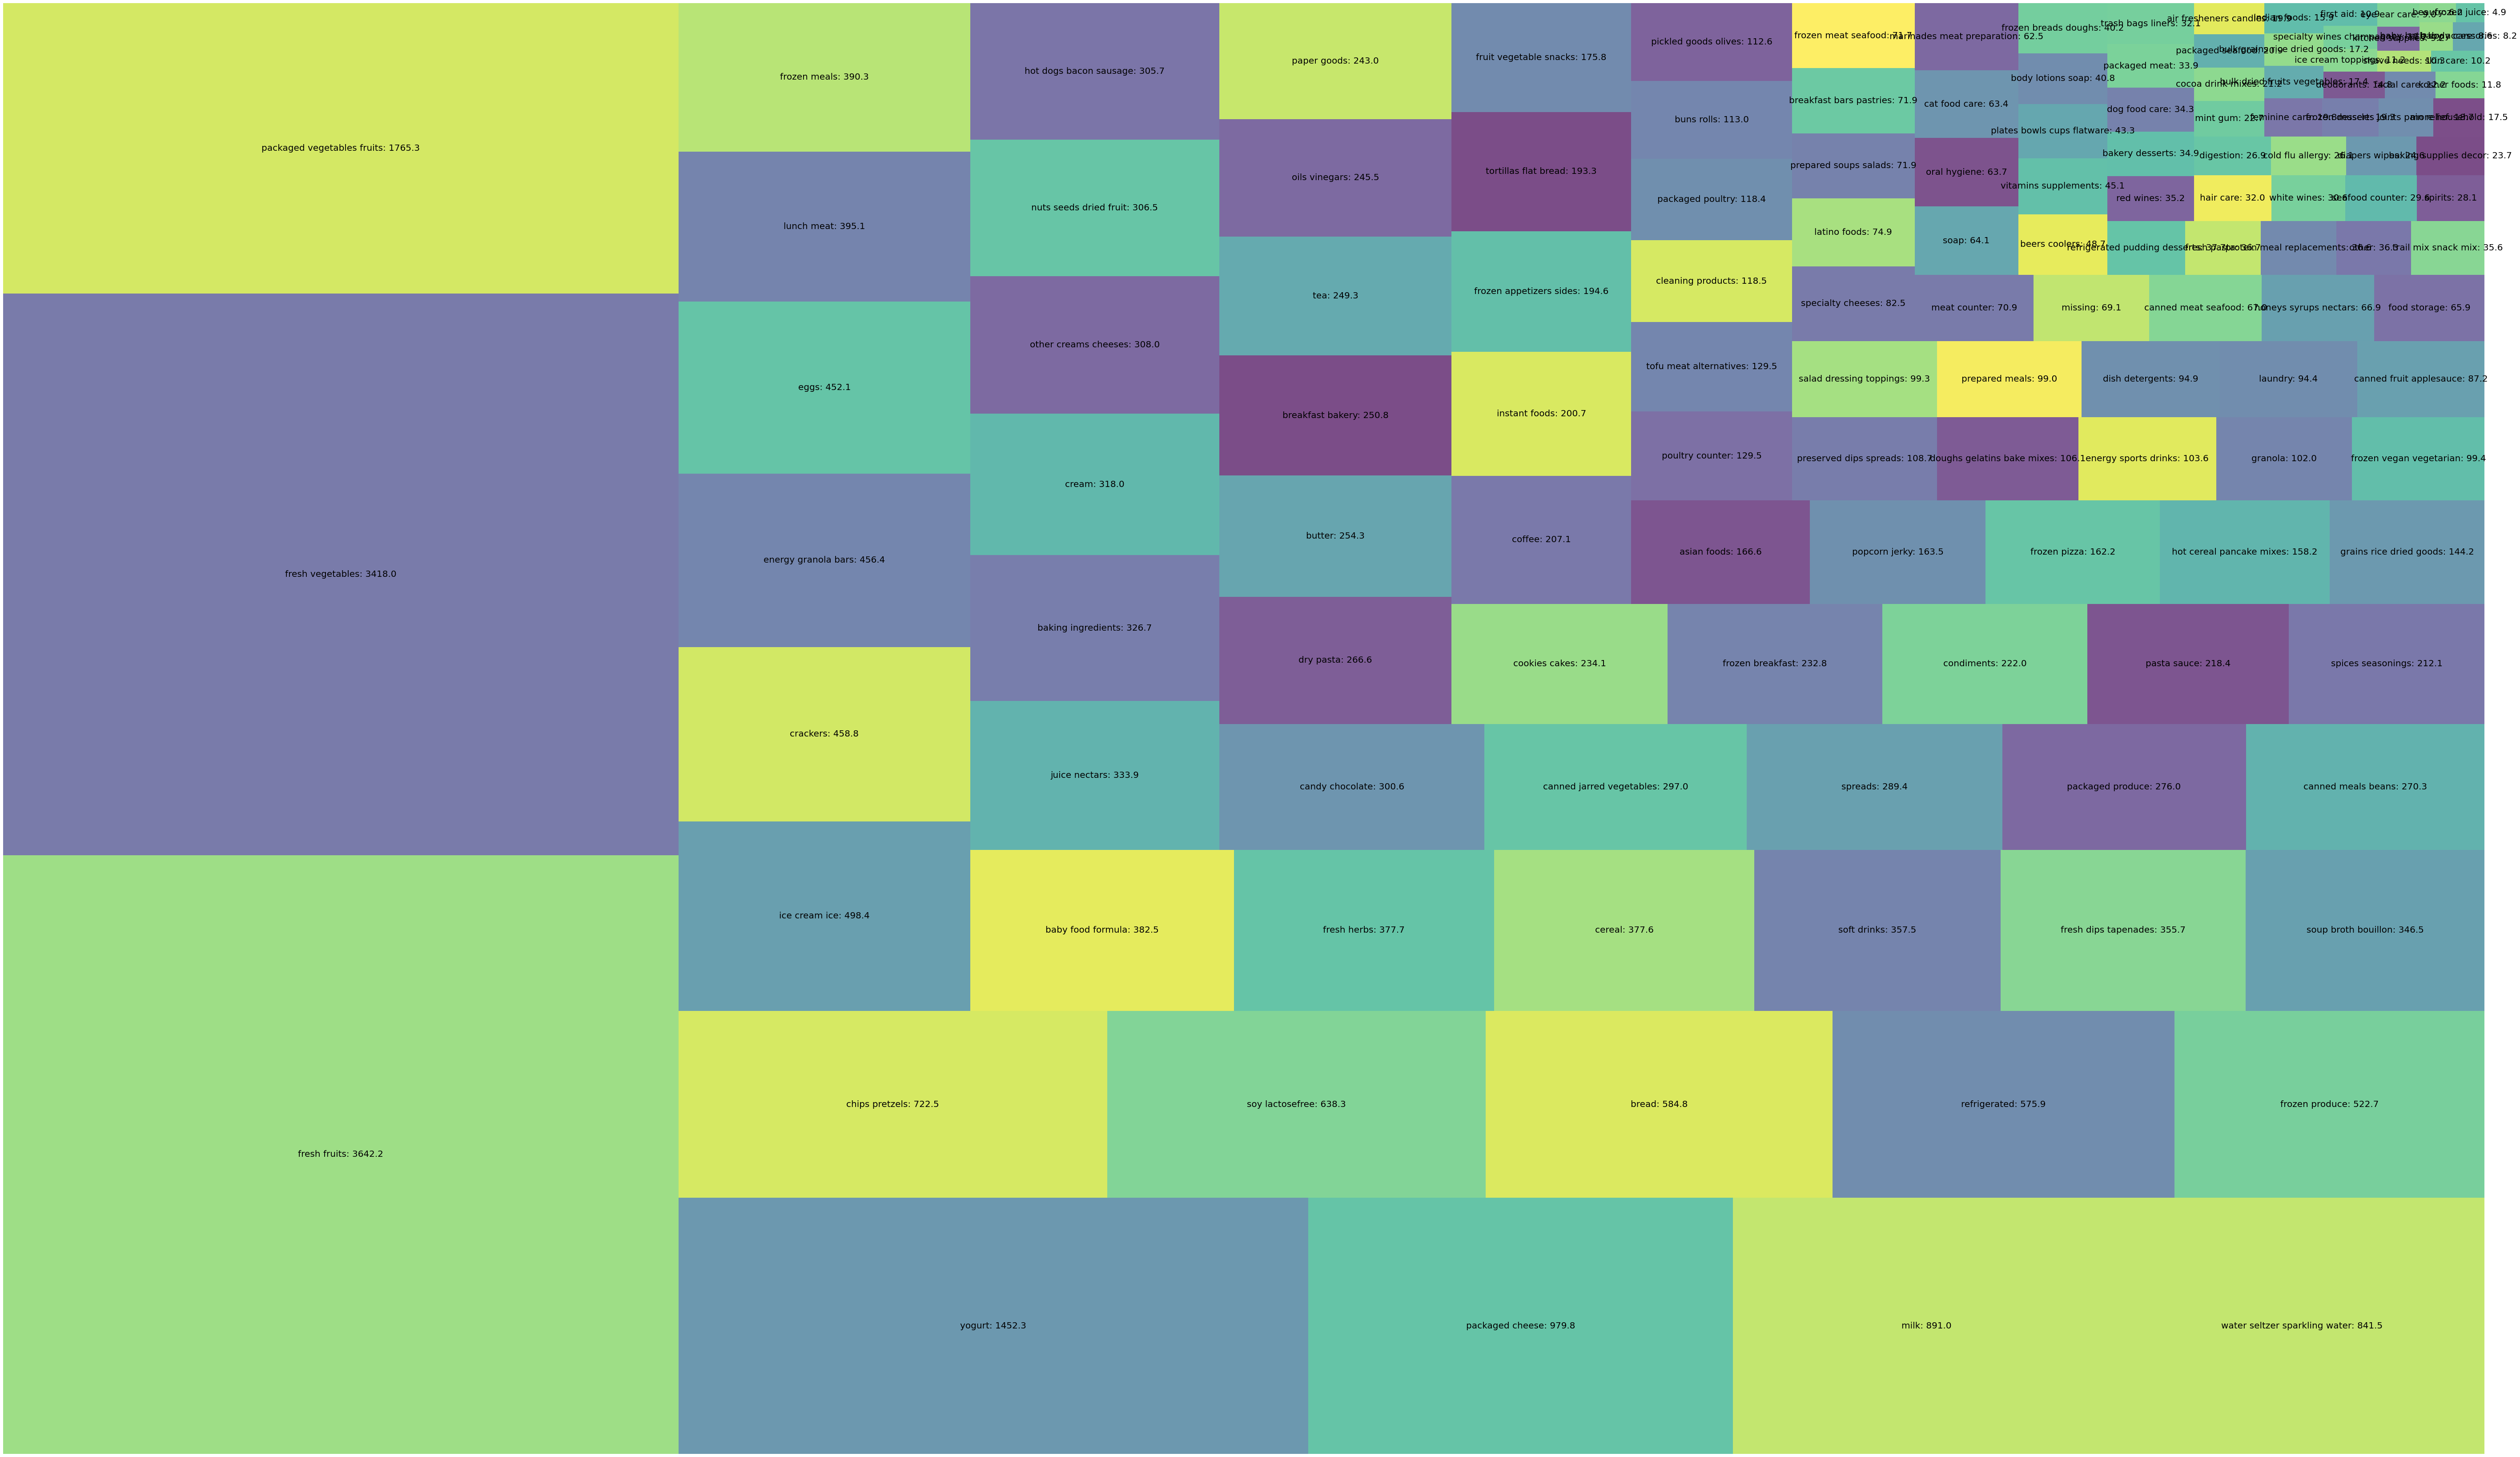

In [58]:
# %pip install squarify
import squarify
fig = plt.figure(figsize=(100,60))
squarify.plot(sizes=new_table_1['count'], label=new_table_1['text'], alpha=0.7,bar_kwargs={'alpha':.7}, text_kwargs={'fontsize':20})
plt.axis("off")
plt.show()